In [ ]:
!python -m spacy download en

In [614]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk import sent_tokenize, word_tokenize
import string
import spacy
nlp = spacy.load("en_core_web_sm")

In [685]:
lang_df = pd.read_csv('./CSV_files/sent_translations.csv')

## Sentence Alignment

In [686]:
lang_df[450:]

,Unnamed: 0,Spanish,English
450,450,El trabajo previo en este grupo de investigaci...,Previous work in this research group centered ...
451,451,Teniendo en cuenta las características Crabtre...,Considering the Crabtree features of this yeas...
452,452,Dado que esta especie está presente en el most...,Since this species is usually present in grape...
453,453,En el caso de levaduras no-Saccharomyces he tr...,The focus of my work on non-Saccharomyces yeas...
454,454,Para S. cerevisiae he utilizado una combinació...,"In the case of S. cerevisiae, I tried to under..."
...,...,...,...
1883,1883,"Asimismo, se exponen datos de oferta y demanda...","Furthermore, supply and demand data are expose..."
1884,1884,A partir de una encuesta a 452 estudiantes de ...,From a survey of 452 students belonging to dif...
1885,1885,"Respecto al primer estudio, los resultados per...","Regarding the first study, the results allow u..."
1886,1886,"Para el segundo, comprender las dificultades e...","As for the second study, to understand the eco..."


In [687]:
lang_df.drop('Unnamed: 0', 1, inplace=True)

# these columns were not correctly aligned
lang_df.drop([5, 96, 98, 100, 103, 106, 109, 112, 259, 260,261,262, 263, 264, 266, 272, 273, 274, 275, 276, 367, 
              375,410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421,422, 434, 435, 436, 281, 282,283, 284, 285, 286,
             287,288, 289, 290, 291, 292,293,294, 295, 296, 297,298,299,300, 301, 302, 397, 398,399,400, 
              401, 402, 403, 404, 405,406,407,408,450,451,452,453,455,456,457, 458, 459, 460, 461, 462, 505, 506,507,508,509], inplace=True)

In [688]:
#lang_df['Spanish'] = lang_df['Spanish'].shift(-1)
lang_df.drop_duplicates(inplace=True)

In [689]:
lang_df.reset_index(inplace=True, drop=True)

In [690]:
lang_df.tail(50)

,Spanish,English
1159,"La edad media era de 74,4 años; el 24,8% eran ...","Mean age was 74.4 years, 24.8% were women."
1160,En ambos grupos la insuficiencia cardiaca (IC)...,Heart failure (HF) was the most frequent clini...
1161,Los hallazgos electrocardiográficos más preval...,The most prevalent electrocardiographic findin...
1162,"Tras un seguimiento mediano de 13,7 meses (ran...",After a median follow-up of 13.7 months (inter...
1163,"El tipo AC-AL (Hazard ratio (HR) 3,41, interva...",Independent predictors of mortality were AL-CA...
1164,"Ambas entidades, y muy especialmente la AC-AL,...",Beta-blocker therapy was associated with longe...
1165,Desde este ejercicio de investigación se reali...,This dissertation explores the idea of intercr...
1166,La intercreatividad es analizada desde un ópti...,Intercreativity is analyzed from an analogical...
1167,El interés por aproximarnos a la educación dig...,The interest in approaching digital education ...
1168,Un ejemplo significativo de ello son los Massi...,A significant example of this is the Massive O...


In [691]:
lang_df.drop([433,434,435,436,437,438,439,440], inplace=True)

In [692]:
lang_df.reset_index(drop=True, inplace=True)

In [693]:
lang_df[700:750]

,Spanish,English
700,"Por lo tanto, en esta tesis doctoral se propon...","Therefore, this doctoral thesis proposes the u..."
701,Previa validación de los algoritmos actuales d...,After validation of the current adaptive therm...
702,Las fases previamente descritas permiten abord...,The stages previously defined allow to address...
703,"Como resultado de esta tesis, se obtiene una v...","As a result of this thesis, a global vision is..."
704,Esto tendría aplicación en el diseño de edific...,This would have application in the design of b...
705,Las partículas aerovagantes dispersadas en el ...,Airborne particles dispersed in the air are a ...
706,Se ha estudiado la concentración de granos de ...,This Doctoral Thesis has studied the concentra...
707,Con motivo de conocer su comportamiento fenoló...,"To know its phenological behavior, specimens o..."
708,"Para “Fraxinus”, “Cupressaceae” y “Olea”, se r...","For “Fraxinus”, “Cupressaceae” and “Olea”, wer..."
709,No siempre se registró una coincidencia ente l...,A coincidence between the maximum phenological...


## Example Sentence

In [694]:
lang_df['English'][700]

'Therefore, this doctoral thesis proposes the use of an adaptive thermal comfort model as a method of predicting energy consumption in the indoor thermal environment with a simulation model: the Adaptive-Comfort-Control-Implemented Model (ACCIM).'

In [695]:
lang_df['Spanish'][700]

'Por lo tanto, en esta tesis doctoral se propone la utilización de un modelo de confort térmico adaptativo como método de predicción de consumo energético en el ambiente térmico mediante un modelo de simulación energética: el Adaptive-Comfort-Control- Implemented Model (ACCIM).'

## Explatory Data Analysis

In [696]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stopword_en = stopwords.words('english')
stopword_sp = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Carmen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [697]:
def text_stats(doc,stopword):
    """
    Pass in a single document
    as a string
    """
    #sents = sent_tokenize(doc)
    #num_sents = len(sents)
    tokens = word_tokenize(doc)
    num_tokens = len(tokens)
    words = [token.lower() for token in tokens 
             if not token in string.punctuation
             if not token.lower() in stopword]
    num_words = len(words)
    vocab = len(set(words))
    characters = sum([len(word) for word in words])
    spacy_doc = nlp(doc)
    numerics = ['DATE', 'TIME', 'PERCENT', 'MONEY', 'QUANTITY','ORDINAL', 'CARDINAL']
    entities = [entity.text for entity in spacy_doc.ents 
                if not entity.label_ in numerics]
    num_entities = len(set(entities))
    #words_sent = num_words / num_sents
    char_word = characters / num_words
    lex_div = vocab / num_words
    stats = [num_tokens, num_words, vocab, num_entities, char_word, lex_div]
    return stats

In [698]:
docs_stats = []
for doc in lang_df['English']:
    docs_stats.append(text_stats(doc, stopword_en))

In [699]:
textstats_en = pd.DataFrame(docs_stats, columns=['Tokens', 'Words', 'Vocabulary', 'Entities', 'Avg Word Length', 'Lexical Diversity'])
textstats_en.head()

,Tokens,Words,Vocabulary,Entities,Avg Word Length,Lexical Diversity
0,13,6,6,1,7.333333,1.0000
1,30,16,15,1,7.500000,0.9375
2,26,15,15,1,8.666667,1.0000
3,23,11,11,0,7.909091,1.0000
4,21,10,10,1,7.900000,1.0000


In [700]:
textstats_en.describe()

,Tokens,Words,Vocabulary,Entities,Avg Word Length,Lexical Diversity
count,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000
mean,32.992506,17.239800,16.261449,1.310575,7.489651,0.965272
std,20.296858,10.673524,8.806149,1.607056,1.065294,0.064803
min,2.000000,1.000000,1.000000,0.000000,2.500000,0.425532
25%,21.000000,11.000000,11.000000,0.000000,6.857143,0.944444
50%,28.000000,15.000000,15.000000,1.000000,7.538462,1.000000
75%,40.000000,21.000000,20.000000,2.000000,8.148148,1.000000
max,199.000000,114.000000,80.000000,21.000000,13.000000,1.000000


In [701]:
nlp = spacy.load("es_core_news_sm")

In [702]:
docs_stats = []
for doc in lang_df['Spanish']:
    docs_stats.append(text_stats(doc, stopword_sp))

In [703]:
textstats_sp = pd.DataFrame(docs_stats, columns=['Tokens', 'Words', 'Vocabulary', 'Entities', 'Avg Word Length', 'Lexical Diversity'])
textstats_sp.head()

,Tokens,Words,Vocabulary,Entities,Avg Word Length,Lexical Diversity
0,16,6,6,0,8.166667,1.0
1,41,16,16,0,7.562500,1.0
2,30,16,16,0,9.437500,1.0
3,28,13,13,0,8.615385,1.0
4,23,11,11,0,9.272727,1.0


In [704]:
textstats_sp.describe()

,Tokens,Words,Vocabulary,Entities,Avg Word Length,Lexical Diversity
count,1201.00000,1201.000000,1201.000000,1201.000000,1201.000000,1201.000000
mean,35.68776,17.828476,16.955037,1.049958,8.010802,0.969543
std,21.48220,10.900255,9.228108,1.801620,1.096335,0.059652
min,3.00000,1.000000,1.000000,0.000000,3.000000,0.500000
25%,23.00000,11.000000,11.000000,0.000000,7.384615,0.952381
50%,31.00000,15.000000,15.000000,0.000000,8.066667,1.000000
75%,42.00000,21.000000,20.000000,1.000000,8.705882,1.000000
max,220.00000,113.000000,88.000000,22.000000,13.000000,1.000000


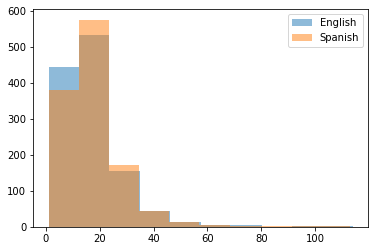

In [705]:
plt.hist(textstats_en['Words'], alpha = .5, label = "English")
plt.hist(textstats_sp['Words'], alpha = .5, label = "Spanish")
plt.legend(loc="upper right")
plt.show()

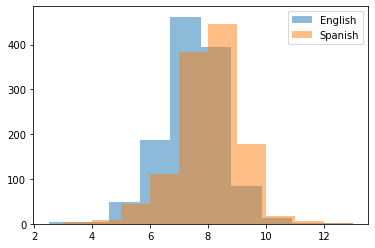

In [706]:
plt.hist(textstats_en['Avg Word Length'], alpha = .5, label = "English")
plt.hist(textstats_sp['Avg Word Length'], alpha = .5, label = "Spanish")
plt.legend(loc="upper right")
plt.show()

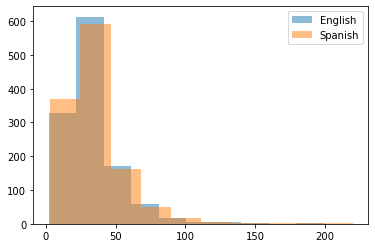

In [707]:
plt.hist(textstats_en['Tokens'], alpha = .5, label = "English")
plt.hist(textstats_sp['Tokens'], alpha = .5, label = "Spanish")
plt.legend(loc="upper right")
plt.show()

In [708]:
# English text
en_doc = nlp(" ".join(lang_df['English']))
en_without_stopwords = [token for token in en_doc if not token.is_stop]
lemmas = [token.lemma_ for token in en_without_stopwords]

# Spanish text
sp_doc = nlp(" ".join(lang_df['Spanish']))
sp_without_stopwords = [token for token in en_doc if not token.is_stop]
lemmas = [token.lemma_ for token in sp_without_stopwords]

In [709]:
lang_df['English'] = lang_df['English'].apply(lambda x: nltk.word_tokenize(x))
lang_df['Spanish'] = lang_df['Spanish'].apply(lambda x: nltk.word_tokenize(x))

In [710]:
lang_df.head()

,Spanish,English
0,"[La, violencia, en, sus, diversas, variantes, ...","[Violence, in, its, several, variations, is, p..."
1,"[Este, fenómeno, impacta, a, un, alto, por, ci...","[This, phenomenon, impacts, a, high, percentag..."
2,"[La, globalización, y, la, continua, búsqueda,...","[Globalization, and, the, continued, quest, of..."
3,"[Asimismo, ,, son, estas, nuevas, tecnologías,...","[It, is, also, these, new, technologies, that,..."
4,"[La, educación, está, en, constante, transmuta...","[Education, is, constantly, changing, because,..."


In [711]:
def plot_wordcloud(stopwords, lang, text, colormap='Reds', mask=None,max_words=500,max_font_size=100,figure_size=(24.0,16.0),title = None, title_size=40, image_color=False):
    stopwords = set(lang)
    more_stopwords = {'one', 'br', 'pr', 'th', 'sayi', 'fo', 'Unknown', 'las', 'la', 'va', 'ha', 'en', 
                          'un', 'han', 'c', 'estas', 'estos', 'dtype', 'se', 'por', 'para', 'de', 'este', 'está','t', 'y', 'm', 'r', 'v', 'p', 'sb', 'iii', 'i'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='black',
                    colormap = colormap,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    plt.imshow(wordcloud);
    plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                              'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  

In [712]:
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')
spanish_stopwords = stopwords.words('spanish')

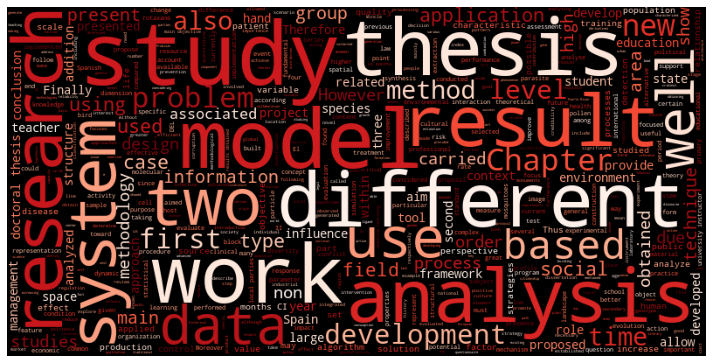

In [713]:
plot_wordcloud(stopword_en, english_stopwords, en_doc, figure_size=(10,10))

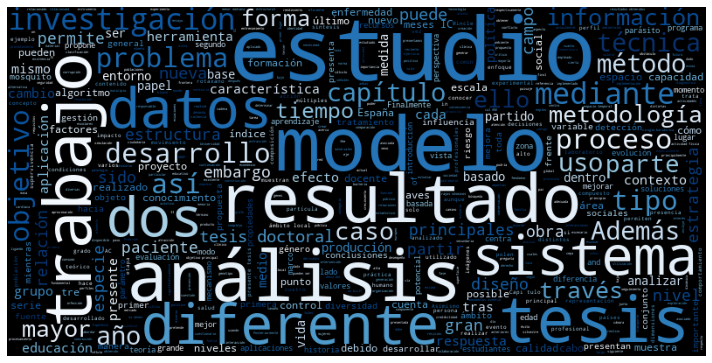

In [714]:
plot_wordcloud(stopword_sp, spanish_stopwords, sp_doc, colormap='Blues', figure_size=(10,10))